In [4]:
import numpy as np
import pickle
import sys
import random
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import pytorch_lightning as pl
import torchmetrics.functional as FM
import seaborn as sns
from tqdm import tqdm
sys.path.append('DG/gan')
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
%matplotlib inline
import gc
matplotlib.style.use('classic')

from sklearn.metrics import precision_recall_fscore_support as score
# pl.utilities.seed.seed_everything(seed=2) # sets seed for pseudo-random number generators in: pytorch, numpy, python.random

In [5]:
# In real data, if flag sum is 1 --> Then no timestep at all. --> So we do remove those ones by converting them to zeros, then remove from the list
# In real data, there is no flag of length ZERO
def remove_zero_datapoints(X,Y,flag):
    indices_non_zero = torch.nonzero(torch.sum(flag,1)-1).squeeze()
    return X[indices_non_zero], Y[indices_non_zero], flag[indices_non_zero]

def get_one_class(X,Y ,flag,class_label): # (X, Y, and flag) are the whole dataset that is consisted of many classes, Y is NOT One-Hot Encoded
    indices_class_label = np.where(Y==class_label)
    return X[indices_class_label], Y[indices_class_label],flag[indices_class_label]

def get_n_samples(X,Y,flag,n_samples):
    randomList = random.sample(range(0, Y.shape[0]), n_samples)
    return X[randomList], Y[randomList], flag[randomList]

In [8]:
train_real = np.load('../data/google/data_train.npz')

real_train_X =  train_real['data_feature']
real_train_Y =  train_real['data_attribute']
real_train_Y_labels = np.argmax(real_train_Y,1)
real_train_flags = torch.from_numpy(train_real['data_gen_flag']) 

real_train_X, real_train_Y_labels, real_train_flags = remove_zero_datapoints(real_train_X, real_train_Y_labels, real_train_flags)

real_train_lengths = np.sum(real_train_flags,1)

real_train_X0,real_train_Y0,real_train_flag0 = get_one_class(real_train_X, real_train_Y_labels,real_train_flags,0)
real_train_X1,real_train_Y1,real_train_flag1 = get_one_class(real_train_X, real_train_Y_labels,real_train_flags,1)
real_train_X2,real_train_Y2,real_train_flag2 = get_one_class(real_train_X, real_train_Y_labels,real_train_flags,2)
real_train_X3,real_train_Y3,real_train_flag3 = get_one_class(real_train_X, real_train_Y_labels,real_train_flags,3)

/rhome/yelnady/.local/lib/python3.8/site-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


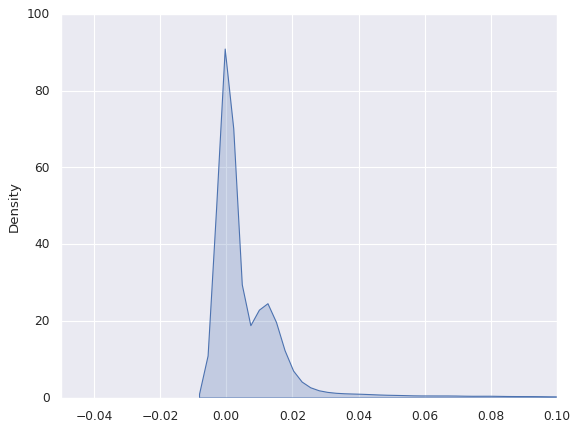

In [62]:
plt.xlim(-0.05,0.1)
# ax = sns.kdeplot(real_train_X[:,0,0], shade=True,cumulative=True)
ax = sns.kdeplot(real_train_X[:,0,0], shade=True)
